In [3]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
pd.set_option('display.max_colwidth', 2000)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
file_list = ['.\\data_anti_racism\\' + i for i in os.listdir('.\\data_anti_racism')]

In [5]:
df = pd.read_csv(file_list[0])
df.head()

,username,userid,time,id,text,davidson,waseem,fountana
0,Rahul Gandhi,@RahulGandhi,3.151620e+07,1098829908355268608,पुलवामा में 40 जवानों की शहादत की खबर के तीन घ...,0.310270,0.035562,0.081596
1,Sanjay Dugar,@dugarsanjays,1.550797e+09,1098829908355268608,Replying to @RahulGandhi मुंबई ताज होटल हमले क...,0.444661,0.382990,0.057303
2,Dr Ram,@dr_rumdev,1.550797e+09,1098829908355268608,Replying to @RahulGandhi,0.145103,0.033523,0.012211
3,KilaFateh #5YearsSuffering,@KilaFateh,1.550797e+09,1098829908355268608,Replying to @RahulGandhi Nothing to say about ...,0.359188,0.201674,0.015849
4,Mahendra,@mahendra899,1.550797e+09,1098829908355268608,Replying to @RahulGandhi कांग्रेस को अपने दिमा...,0.330098,0.033523,0.062892


In [ ]:
# new_columns = ['Unnamed', 'username', 'userid', 'time', 'id', 'text', 'davidson', 'waseem', 'fountana']
# mismatched_files = []
# for file in file_list:
#     df = pd.read_csv(file)
#     if df.shape[1] != len(new_columns):
#         mismatched_files.append(file)
#     else:
#         df.columns = new_columns
#         df.to_csv(file, index=False)

# len(mismatched_files)

In [ ]:
# df = pd.read_csv(mismatched_files[24])
# df.head()

In [ ]:
#REMOVING EXTRA COLUMNS AND RENAMING THEM FOR EDA
# new_columns = ['username', 'userid', 'time', 'id', 'text', 'davidson', 'waseem', 'fountana']
# for file in file_list:
#     df = pd.read_csv(file)

#     if df.shape[1] > len(new_columns):
#         df = df.iloc[:, 1:]

#     df.columns = new_columns
#     df.to_csv(file, index=False)

In [ ]:
# first_df = df = pd.read_csv(file_list[0])
# first_columns = first_df.columns.tolist()
# all_same_columns = True
# for file in file_list[1:]:
#     current_df = pd.read_csv(file)
#     if first_columns != current_df.columns.tolist():
#         all_same_columns = False
#         break

# if all_same_columns:
#     print("All csv files have the same column names.")
# else:
#     print("The csv files have different column names.")

In [6]:
df_list = []

for file in file_list:
    df = pd.read_csv(file)
    df_list.append(df)

In [ ]:
df_list

In [ ]:
# info_df = pd.DataFrame(columns=['no. of comments', 'mean length of comments', 'SD of length of comments', 'min length of comment','max length of comment', 
#                                 'no. of unique users', 
#                                 'mean no. of words in comments', 'SD of no. of words in comment', 'min no. of words in comment', 'max no. of words in comment',
#                                 'mean no. of hashtags in comments', 'SD of no. of hashtags in comment', 'min no. of hashtags in comment', 'max no. of hashtags in comment',
#                                 'mean no. of mentions in comments', 'SD of no. of mentions in comment', 'min no. of mentions in comment', 'max no. of mentions in comment',])

# for df in df_list:
#     # print(df.info())
#     num_comments = df['text'].count()
#     mean_comments = df['text'].str.len().mean()
#     SD_comments = df['text'].str.len().std()
#     min_comments = df['text'].str.len().min()
#     max_comments = df['text'].str.len().max()
    
#     num_users = df['username'].nunique()

#     mean_words = df['text'].apply(lambda x: len(str(x).split())).mean()
#     SD_words = df['text'].apply(lambda x: len(str(x).split())).std()
#     min_words = df['text'].apply(lambda x: len(str(x).split())).min()
#     max_words = df['text'].apply(lambda x: len(str(x).split())).max()

#     mean_hashtags = df['text'].str.count('#').mean()
#     SD_hashtags = df['text'].str.count('#').std()
#     min_hashtags = df['text'].str.count('#').min()
#     max_hashtags = df['text'].str.count('#').max()

#     mean_mentions = df['text'].str.count('@').mean()
#     SD_mentions = df['text'].str.count('@').std()
#     min_mentions = df['text'].str.count('@').min()
#     max_mentions = df['text'].str.count('@').max()

#     info_df = pd.concat([info_df, pd.DataFrame(
#                             {'no. of comments':[num_comments], 'mean length of comments':[mean_comments], 'SD of length of comments':[SD_comments], 'min length of comment':[min_comments],'max length of comment':[max_comments], 
#                             'no. of unique users':[num_users], 
#                             'mean no. of words in comments':[mean_words], 'SD of no. of words in comment':[SD_words], 'min no. of words in comment':[min_words], 'max no. of words in comment':[max_words],
#                             'mean no. of hashtags in comments':[mean_hashtags], 'SD of no. of hashtags in comment':[SD_hashtags], 'min no. of hashtags in comment':[min_hashtags], 'max no. of hashtags in comment':[max_hashtags],
#                             'mean no. of mentions in comments':[mean_mentions], 'SD of no. of mentions in comment':[SD_mentions], 'min no. of mentions in comment':[min_mentions], 'max no. of mentions in comment':[max_mentions]}, 
#                             )], ignore_index=True)

In [ ]:
info_df = pd.read_csv('D:\Codes\Python\Anti_racism_thread_analysis.csv')

In [ ]:
info_df.head(5)

In [ ]:
unique_userids = {uid for df in df_list for uid in df['userid'].unique()}
total_unique_userids = len(unique_userids)

In [ ]:
print('Total number of threads:', info_df.shape[0])
print('Total number of comments:',info_df['no. of comments'].sum())
print('Total number of unique users in the whole dataset:', total_unique_userids)

In [64]:
des = info_df.describe().T

<Axes: >

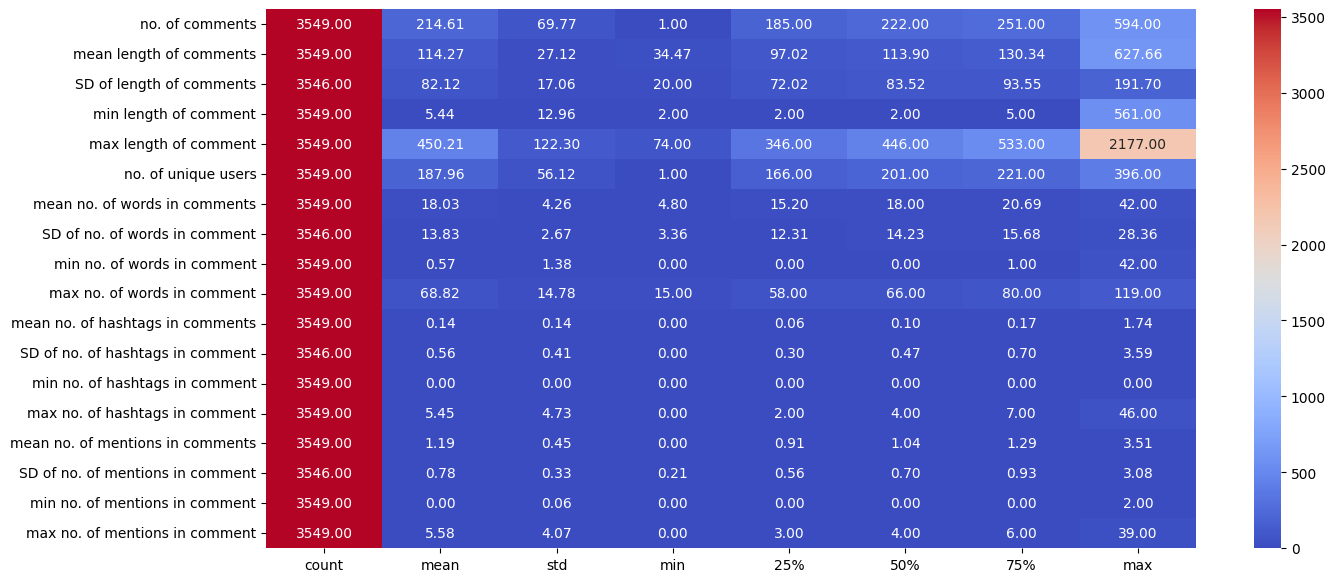

In [86]:
plt.figure(figsize = (15, 7))
sns.heatmap(des, annot=True, cmap = 'coolwarm', fmt=".2f")
                            

In [ ]:
print(info_df['mean length of comments'].mean())
plt.figure(figsize=(15, 6))
sns.histplot(info_df['mean length of comments'], bins=40, kde = True)
plt.xticks(np.linspace(min(info_df['mean length of comments']), max(info_df['mean length of comments']), 20))
plt.xlabel('Mean Length of Comments')
plt.ylabel('Frequency')
plt.title('Histogram Plot for Mean Length of Comments in each Thread')

In [ ]:
print(info_df['mean no. of words in comments'].mean())
plt.figure(figsize=(15, 6))
sns.histplot(info_df['mean no. of words in comments'], bins=35, kde = True)
plt.xticks(np.linspace(min(info_df['mean no. of words in comments']), max(info_df['mean no. of words in comments']), 20))
plt.xlabel('Mean no. of words in comments')
plt.ylabel('Frequency')
plt.title('Histogram Plot for Mean no. of words in comments of each Thread')

In [ ]:

print(info_df['no. of unique users'].mean())
plt.figure(figsize=(15, 6))
sns.histplot(info_df['no. of unique users'], bins=30, kde = True)
plt.xticks(np.linspace(min(info_df['no. of unique users']), max(info_df['no. of unique users']), 20))
plt.xlabel('No. of unique users')
plt.ylabel('Frequency')
plt.title('Histogram Plot for No. of Unique users in each Thread')

In [ ]:
sns.pairplot(info_df[['mean length of comments', 'mean no. of words in comments', 'no. of unique users']], diag_kind='kde')
plt.suptitle('Pairplot for Mean Length of Comments, Mean No. of Words in Comments, and No. of Unique Users', fontsize=13, y=1.05)
plt.figure(figsize=(16,10))

In [9]:
# text_values = [df.iloc[0]['text'] for df in df_list]
# new_df = pd.DataFrame({'Anti_Racism_post': text_values})

# new_df.to_csv('Anti_Racism_post.csv', index=False, encoding='utf-8-sig')

PERSPECTIVE API 

In [9]:
per_score = pd.read_csv(".\\Perspective_score_Anti_Racism_Post.csv")

In [ ]:
per_score.head()

In [ ]:
per_score.describe().T

In [ ]:
plt.figure(figsize=(15, 6))
sns.histplot(data = per_score, x = 'Severe_Toxicity')

In [ ]:
plt.figure(figsize=(15, 6))
sns.histplot(data = per_score, x = 'Toxicity', kde=True)
plt.xticks(np.arange(0, 1, 0.05))
plt.xlabel('Toxicity')
plt.ylabel('Frequency')

In [ ]:
df1 = per_score[(per_score['Toxicity'] >= 0.35)].sort_values(by='Toxicity')
# df1 = random_sample[(random_sample['Toxicity'] >= 0.5) & (random_sample['Toxicity'] <= 0.6)].sort_values(by='Toxicity')
print(df1.shape)

RANDOM SAMPLING

In [15]:
random_sample = per_score.sample(n = 500)

In [ ]:
plt.figure(figsize=(15, 6))
sns.histplot(data = random_sample, x = 'Severe_Toxicity')

In [ ]:
plt.figure(figsize=(15, 6))
sns.histplot(data = random_sample, x = 'Toxicity', kde=True)
plt.xticks(np.arange(0, 1, 0.05))
plt.xlabel('Toxicity')
plt.ylabel('Frequency')

In [ ]:
# df1 = random_sample[(random_sample['Severe_Toxicity'] >= 0.8) & (random_sample['Severe_Toxicity'] <= .9)].sort_values(by='ToxiSevere_Toxicity')
df1 = random_sample[(random_sample['Severe_Toxicity'] >= 0.1)].sort_values(by='Severe_Toxicity')
print(df1.shape)
print(df1['Severe_Toxicity'].mean())
df1.head(1000)

In [ ]:
# df2 = random_sample[(random_sample['Toxicity'] >= 0.5) & (random_sample['Toxicity'] <= 0.6)].sort_values(by='Toxicity')
df2 = random_sample[(random_sample['Toxicity'] >= 0.35)].sort_values(by='Toxicity')
print(df2.shape)
print(df2['Severe_Toxicity'].mean())
df2.head(1000)

SOME PLOTS BETWEEN 'Toxicity' AND 'Severe_Toxicity'

In [ ]:
plt.figure(figsize=(15, 6))
sns.lineplot(data = per_score, x = 'Toxicity', y = 'Severe_Toxicity')

In [ ]:
sns.scatterplot(per_score, x = 'Toxicity', y = 'Severe_Toxicity')

In [ ]:
sns.jointplot(data = per_score, x='Toxicity', y = 'Severe_Toxicity', kind = "kde")

In [ ]:
# sns.heatmap(per_score.corr(), annot=True, cmap="coolwarm")
sns.pairplot(per_score, kind='kde')